## 2D Tests for cpu

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [104]:
def update(T_k, T_0):
    
    T_kP1 = T_0.copy()
    
    length = len(T_k)
    width = len(T_k[0].A1)
    
    for i in range(1, length - 1):
        for j in range(1, width - 1):
            ## i and j now index the entire inside of the array and does not touch any of the edges
            
            T_kP1[i,j] += 1/4*(T_k[i,j+1] + T_k[i,j-1] + T_k[i+1,j] + T_k[i-1,j])
    
    return T_kP1

def boundary(top, left, right, bottom, T_ambient, corners=[0,0,0,0]):
    cols = len(top)+2
    rows = len(left)+2
    
    middle_zeros = np.array([0 for i in top])
    middle_ambient = np.array([T_ambient for i in top])
    
    if corners == [0,0,0,0]:
        initial_top = np.append(np.append([(top[0]+left[0])/2],top), [(top[-1]+right[0])/2])
        initial_bottom = np.append(np.append([(bottom[0]+left[-1])/2],bottom), [(bottom[-1]+right[-1])/2])
    else:
        initial_top = np.append(np.append([corners[0]],top), [corners[1]])
        initial_bottom = np.append(np.append([corners[2]],bottom), [corners[3]])
    
    
    
    middle = np.array(np.append([np.append(np.append([left[i]], middle_zeros), [right[i]]) for i in range(rows-2)],[]))
    middle_ambient = np.array(np.append([np.append(np.append([left[i]], middle_ambient), [right[i]]) for i in range(rows-2)],[]))
    
    initial_array = np.append(np.append(initial_top, middle), initial_bottom)
    initial_matrix_T_0 = np.matrix(initial_array.reshape(rows, cols))
    
    initial_array = np.append(np.append(initial_top, middle_ambient), initial_bottom)
    initial_matrix_T_k = np.matrix(initial_array.reshape(rows, cols))
    
    
    return initial_matrix_T_0, initial_matrix_T_k

In [89]:
top = np.array([1,2,3,4])/2
bottom = np.array([1,2,3,4])/2
left = [0.5 for i in range(6)]
right = [2 for i in range(6)]

T_0, t_k = boundary(top, left, right, bottom, 0.5, [0.5, 2, 0.5, 2])
#print(T_0, '\n' ,t_k)



[[0.5 0.5 1.  1.5 2.  2. ]
 [0.5 0.  0.  0.  0.  2. ]
 [0.5 0.  0.  0.  0.  2. ]
 [0.5 0.  0.  0.  0.  2. ]
 [0.5 0.  0.  0.  0.  2. ]
 [0.5 0.  0.  0.  0.  2. ]
 [0.5 0.  0.  0.  0.  2. ]
 [0.5 0.5 1.  1.5 2.  2. ]] 
 [[0.5 0.5 1.  1.5 2.  2. ]
 [0.5 0.5 0.5 0.5 0.5 2. ]
 [0.5 0.5 0.5 0.5 0.5 2. ]
 [0.5 0.5 0.5 0.5 0.5 2. ]
 [0.5 0.5 0.5 0.5 0.5 2. ]
 [0.5 0.5 0.5 0.5 0.5 2. ]
 [0.5 0.5 0.5 0.5 0.5 2. ]
 [0.5 0.5 1.  1.5 2.  2. ]]


In [53]:
t = np.array([[1,2,3],[4,5,6]])
t = np.append(t, [])
t = np.append(t, [4,9,9])
t = np.append(t, [4,9,9])
t = t.reshape(4,3)
t

[1. 2. 3. 4. 5. 6.]


array([[1., 2., 3.],
       [4., 5., 6.],
       [4., 9., 9.],
       [4., 9., 9.]])

In [63]:
rows = 6
i = 2

left = [1,2,3,4]
right = [4,3,2,1]
middle_zeros = [0,0,0,0,0]

middle = np.array(np.append([np.append(np.append([left[i]], middle_zeros), [right[i]]) for i in range(rows-2)],[]))
#print([[left[i], middle_zeros, right[i]] for i in range(rows-2)])
middle = middle.reshape(4,7)
middle

array([[1., 0., 0., 0., 0., 0., 4.],
       [2., 0., 0., 0., 0., 0., 3.],
       [3., 0., 0., 0., 0., 0., 2.],
       [4., 0., 0., 0., 0., 0., 1.]])

In [139]:
top = np.array(np.linspace(0.5,2,52)[1:-1])
bottom = top.copy()
left = [0.5 for i in range(20)]
right = [2 for i in range(20)]

T_0, T_k = boundary(top, left, right, bottom, 0.5, [0.5, 2, 0.5, 2])
T_initial = T_k.copy()

for i in range(2000):
    T_k = update(T_k, T_0)

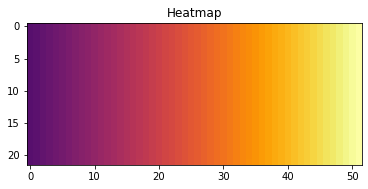

In [140]:
plt.title("Heatmap")
plt.imshow(T_k, cmap='inferno', vmin=0, vmax=2)

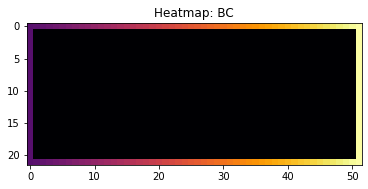

In [142]:
plt.title("Heatmap: BC")
plt.imshow(T_0, cmap='inferno', vmin=0, vmax=2)

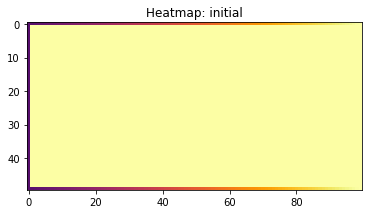

In [201]:
plt.title("Heatmap: initial")
plt.imshow(T_initial, cmap='inferno', vmin=0, vmax=2)

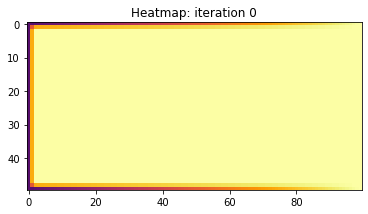

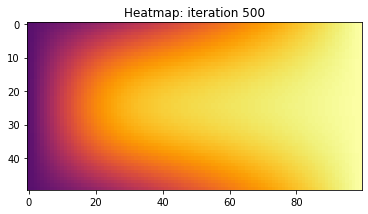

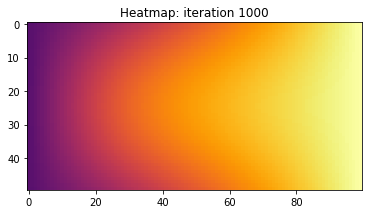

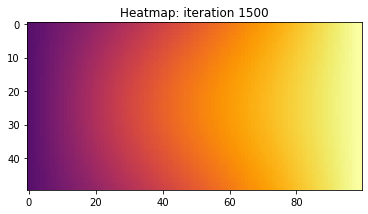

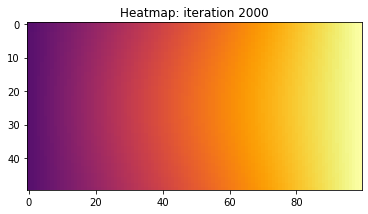

In [157]:
top = np.array(np.linspace(0.5,2,100)[1:-1])
bottom = top.copy()
left = [0.5 for i in range(48)]
right = [2 for i in range(48)]

T_0, T_k = boundary(top, left, right, bottom, 2, [0.5, 2, 0.5, 2])
T_initial = T_k.copy()

n = 2000

for i in range(n):
    if (i-1)%(n/4) == 0:
        plt.title(f"Heatmap: iteration {i-1}")
        plt.imshow(T_k, cmap='inferno', vmin=0, vmax=2)
        plt.show()
    
    T_k = update(T_k, T_0)

plt.title(f"Heatmap: iteration {n}")
plt.imshow(T_k, cmap='inferno', vmin=0, vmax=2)
plt.show()    
    


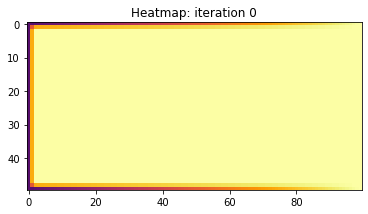

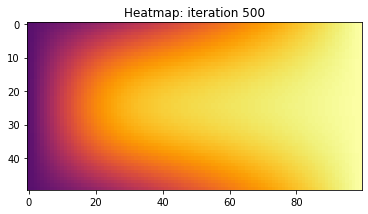

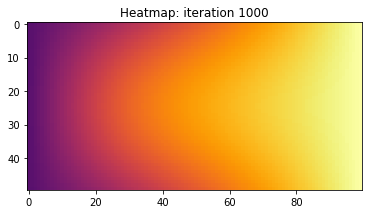

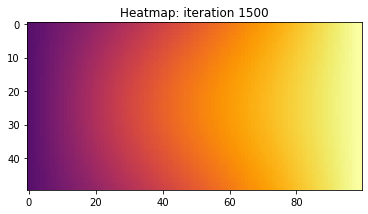

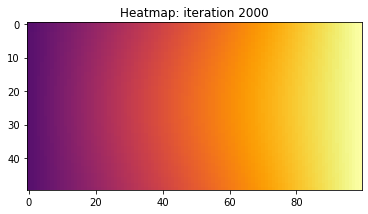

In [158]:
top = np.array(np.linspace(0.5,2,100)[1:-1])
bottom = top.copy()
left = [0.5 for i in range(48)]
right = [2 for i in range(48)]

T_0, T_k = boundary(top, left, right, bottom, 2, [0.5, 2, 0.5, 2])
T_initial = T_k.copy()

n = 2000

for i in range(n):
    if (i-1)%(n/4) == 0:
        plt.title(f"Heatmap: iteration {i-1}")
        plt.imshow(T_k, cmap='inferno', vmin=0, vmax=2)
        plt.show()
    
    T_k = update(T_k, T_0)

plt.title(f"Heatmap: iteration {n}")
plt.imshow(T_k, cmap='inferno', vmin=0, vmax=2)
plt.show()    

Text(0.5, 0, 'Temperature Scale')

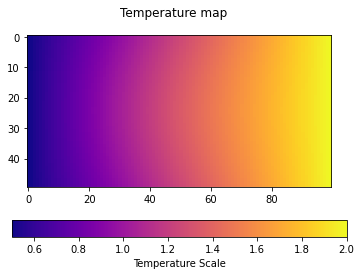

In [199]:
#plt.title(f"Heatmap: iteration {n}")
#plt.imshow(T_k, cmap='inferno', vmin=0, vmax=2)
#plt.show()  


fig, ax = plt.subplots()
im = ax.imshow(T_k, cmap='plasma', vmin=0.5, vmax=2)
fig.suptitle('Temperature map')
cbar = ax.figure.colorbar(im, orientation='horizontal')
cbar.ax.set_xlabel('Temperature Scale')
